In [1]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
wine2 = pd.DataFrame(df.drop(['alcohol','ash','magnesium','color_intensity'],axis = 1))

In [5]:
input = wine2.drop('target', axis = 1).to_numpy()
output = wine2['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=2022,stratify=wine2.target,shuffle = True)

#X_train = torch.FloatTensor(X_train).to(device)
#y_train = torch.LongTensor(y_train).to(device)
#X_test = torch.FloatTensor(X_test)
#y_test = torch.LongTensor(y_test)

In [6]:
print(input[0])

[1.710e+00 1.560e+01 2.800e+00 3.060e+00 2.800e-01 2.290e+00 1.040e+00
 3.920e+00 1.065e+03]


In [7]:
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
class CustomDataset(Dataset):
  def __init__(self):
    
    self.x_data = X_train
    self.y_data = [[y] for y in y_train]

  def __len__(self):

    return len(self.x_data)

  def __getitem__(self, idx):

    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)

    return x,y

In [9]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) #sampler를 만들었다면, sampler를 파라미터로 넣어줄 수 있음 : https://hyelimkungkung.tistory.com/29?category=935193 참고 ㅎㅎ

In [10]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 50, bias=True),
          nn.RReLU(),


        nn.BatchNorm1d(50)
        )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 3, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [11]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [12]:
model = Model().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [13]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [ ]:
losses = []
for epoch in range(2000):

  for x, y in dataloader:
    optimizer.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss(hypothesis, y)
    cost.backward()
    optimizer.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

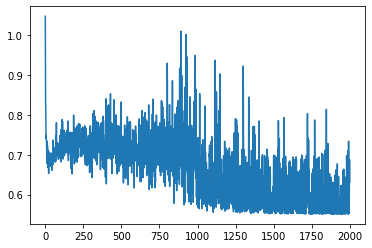

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [17]:
with torch.no_grad():
  model = model.to('cpu')
  X_test = torch.FloatTensor(X_test)
  y_pred = model(X_test)

  y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
  predicted = np.argmax(y_pred,axis=1)
  accuracy = (accuracy_score(predicted,y_test))
  print(f'model의 output은 :  {y_pred[0]}' )
  print(f'argmax를 한 후의 output은 {predicted[0]}')
  print(f'accuracy는 {accuracy}')

model의 output은 :  [0.0024401 0.        0.9975599]
argmax를 한 후의 output은 2
accuracy는 0.847457627118644


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


reakyrelu는 84프로의 정확도

In [18]:
class Model2(torch.nn.Module):

  def __init__(self):
    super(Model2, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 50, bias=True),
          nn.ReLU(),


        nn.BatchNorm1d(50)
        )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 3, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [19]:
model2 = Model2().to(device)
model2.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model2(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [20]:
loss2 = nn.CrossEntropyLoss().to(device)
optimizer2 = optim.SGD(model2.parameters(), lr=0.05)

In [ ]:
  losses = []

  for epoch in range(2000):
    for x, y in dataloader:
      optimizer2.zero_grad()
      x = x.to(device)
      y = y.to(device)

      hypothesis = model2(x)

      y = y.squeeze()
      cost = loss2(hypothesis, y)
      cost.backward()
      optimizer2.step()
    losses.append(cost.item()) 

    if epoch % 10 == 0:
        print(epoch, cost.item())


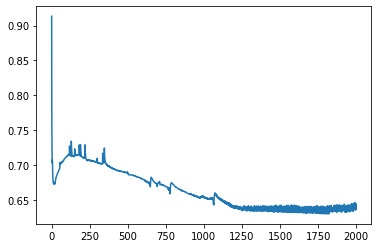

In [23]:
plt.plot(losses)
plt.show()

In [25]:
with torch.no_grad():
  model2 = model2.to('cpu')
  X_test = torch.FloatTensor(X_test)
  y_pred = model2(X_test)

  y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
  predicted = np.argmax(y_pred,axis=1)
  accuracy = (accuracy_score(predicted,y_test))
  print(f'model의 output은 :  {y_pred[0]}' )
  print(f'argmax를 한 후의 output은 {predicted[0]}')
  print(f'accuracy는 {accuracy}')

model의 output은 :  [1.000000e+00 3.594666e-27 2.579021e-39]
argmax를 한 후의 output은 0
accuracy는 0.6949152542372882


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


그냥 relu는 64프로의 정확도

In [28]:
class Model3(torch.nn.Module):

  def __init__(self):
    super(Model3, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 50, bias=True),
          nn.RReLU(),


        nn.BatchNorm1d(50)
        )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(50, 3, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [29]:
model3 = Model3().to(device)
model3.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model3(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer5): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [35]:
loss3 = nn.CrossEntropyLoss().to(device)
optimizer3 = optim.SGD(model3.parameters(), lr=0.5)

In [ ]:
losses = []

for epoch in range(2000):
  for x, y in dataloader:
    optimizer3.zero_grad()
    x = x.to(device)
    y = y.to(device)

    hypothesis = model3(x)

    y = y.squeeze()
    cost = loss3(hypothesis, y)
    cost.backward()
    optimizer3.step()
  losses.append(cost.item()) 

  if epoch % 10 == 0:
      print(epoch, cost.item())

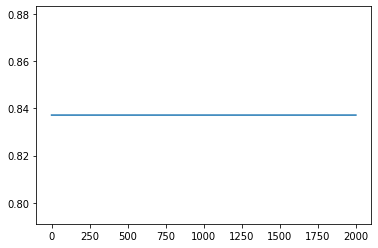

In [37]:
plt.plot(losses)
plt.show()

In [38]:
with torch.no_grad():
  model3 = model3.to('cpu')
  X_test = torch.FloatTensor(X_test)
  y_pred = model3(X_test)

  y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
  predicted = np.argmax(y_pred,axis=1)
  accuracy = (accuracy_score(predicted,y_test))
  print(f'model의 output은 :  {y_pred[0]}' )
  print(f'argmax를 한 후의 output은 {predicted[0]}')
  print(f'accuracy는 {accuracy}')

model의 output은 :  [0. 1. 0.]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


왜인지 레이어를 늘렸는데 정확도가 떨어졌다... 과적합이 일어난 것 같다

In [39]:
batch_size = 10

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) #sampler를 만들었다면, sampler를 파라미터로 넣어줄 수 있음 : https://hyelimkungkung.tistory.com/29?category=935193 참고 ㅎㅎ

In [40]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 50, bias=True),
          nn.RReLU(),


        nn.BatchNorm1d(50)
        )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 3, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [41]:
model = Model().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05)
losses = []
for epoch in range(2000):

  for x, y in dataloader:
    optimizer.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss(hypothesis, y)
    cost.backward()
    optimizer.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

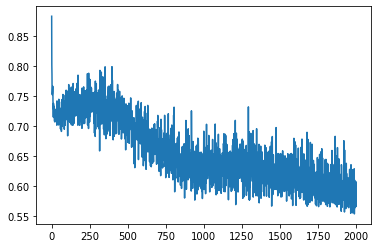

In [43]:
plt.plot(losses)
plt.show()

In [44]:
with torch.no_grad():
  model = model.to('cpu')
  X_test = torch.FloatTensor(X_test)
  y_pred = model(X_test)

  y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
  predicted = np.argmax(y_pred,axis=1)
  accuracy = (accuracy_score(predicted,y_test))
  print(f'model의 output은 :  {y_pred[0]}' )
  print(f'argmax를 한 후의 output은 {predicted[0]}')
  print(f'accuracy는 {accuracy}')

model의 output은 :  [9.990798e-01 8.407791e-45 9.201202e-04]
argmax를 한 후의 output은 0
accuracy는 0.8983050847457628


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


batchsize를 10으로 증가시킬 경우 정확도가 90프로 가까이 증가하였다.

In [45]:
class Model4(torch.nn.Module):

  def __init__(self):
    super(Model4, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 50, bias=True),
          nn.RReLU(),


        nn.BatchNorm1d(50)
        )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer4 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.RReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(50, 3, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [46]:
model4 = Model4().to(device)
model4.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model4(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (layer5): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [47]:
loss5 = nn.CrossEntropyLoss().to(device)
optimizer5 = optim.SGD(model4.parameters(), lr=0.05)
losses = []
for epoch in range(2000):

  for x, y in dataloader:
    optimizer5.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model4(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss(hypothesis, y)
    cost.backward()
    optimizer5.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.1835360527038574
10 0.8017328381538391
20 0.7356793284416199
30 0.731231689453125
40 0.7327108383178711
50 0.7328962683677673
60 0.7386424541473389
70 0.7354408502578735
80 0.7257237434387207
90 0.742519736289978
100 0.7151781916618347
110 0.7649528980255127
120 0.7304109930992126
130 0.7261471152305603
140 0.768601655960083
150 0.729958176612854
160 0.7352673411369324
170 0.6903524994850159
180 0.7848976850509644
190 0.7597911357879639
200 0.7662385106086731
210 0.7221719026565552
220 0.7530509233474731
230 0.7614943981170654
240 0.7510396838188171
250 0.7621196508407593
260 0.7453920245170593
270 0.7689065933227539
280 0.7416830658912659
290 0.7972152233123779
300 0.6834931373596191
310 0.6819607019424438
320 0.7259416580200195
330 0.7023509740829468
340 0.7499406337738037
350 0.7310308814048767
360 0.7621461749076843
370 0.7689636945724487
380 0.7429031729698181
390 0.746813178062439
400 0.7663787603378296
410 0.7121069431304932
420 0.6884772181510925
430 0.7155764102935791
440 

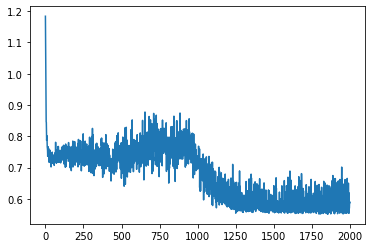

In [48]:
plt.plot(losses)
plt.show()

In [50]:
with torch.no_grad():
  mode4 = model4.to('cpu')
  X_test = torch.FloatTensor(X_test)
  y_pred = model4(X_test)

  y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
  predicted = np.argmax(y_pred,axis=1)
  accuracy = (accuracy_score(predicted,y_test))
  print(f'model의 output은 :  {y_pred[0]}' )
  print(f'argmax를 한 후의 output은 {predicted[0]}')
  print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9999976e-01 0.0000000e+00 2.3143977e-07]
argmax를 한 후의 output은 0
accuracy는 0.864406779661017


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


과적합이 일어났던 모델에 대해 배치 사이즈를 증가시킨후 해본 결과 과적합이 해결된 것을 확인할 수 있었다.